# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [2]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression
# https://docs.google.com/presentation/d/1NfC05Wi6sAkbS9U4X6RW9jyW5auU901wPTRAtopw9qA/edit?usp=drive_link

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 350 (delta 54), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (350/350), 42.64 MiB | 18.76 MiB/s, done.
Resolving deltas: 100% (177/177), done.
/content/machine_learning_1/linear_regression/machine_learning_1/linear_regression


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [4]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


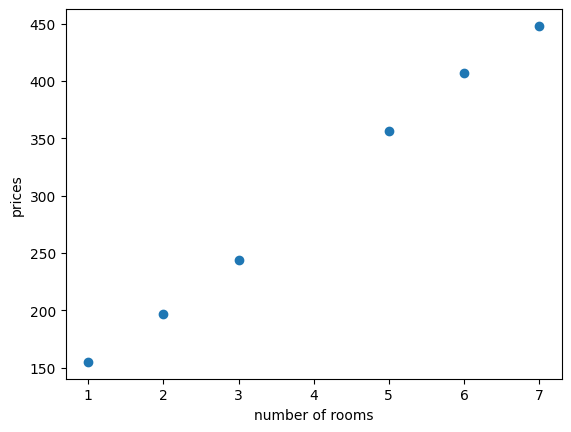

In [5]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [7]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price
    #????????

In [8]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predicted_price=price_per_room*num_rooms+base_price
    price_per_room=price_per_room+learning_rate*(price-predicted_price)*num_rooms
    base_price=base_price+learning_rate*(price-predicted_price)
    return price_per_room, base_price

In [9]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predicted_price=price_per_room*num_rooms+base_price
    if price-predicted_price >0:
      price_per_room=price_per_room+learning_rate*num_rooms
      base_price=base_price+learning_rate
    else:
      price_per_room=price_per_room-learning_rate*num_rooms
      base_price=base_price-learning_rate
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 49.79143221118902
Base price: 99.45997452167688


(49.79143221118902, 99.45997452167688)

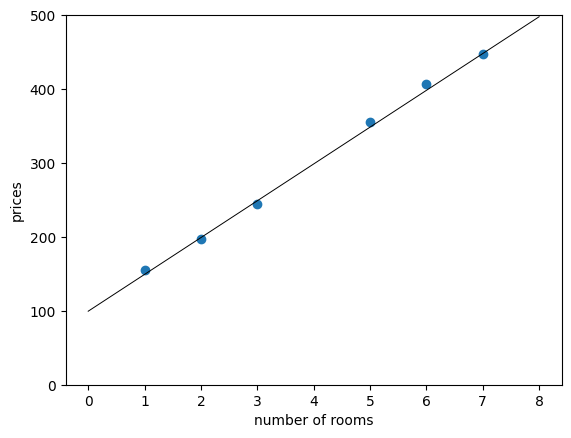

In [18]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for i in range(epochs):
      id=random.randint(0,5)
      num_rooms=features[id]
      price=labels[id]
      price_per_room, base_price=square_trick(base_price, price_per_room, num_rooms, price, learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.02, epochs = 1000)

Price per room: 49.844421851525055
Base price: 102.7579544029403


(49.844421851525055, 102.7579544029403)

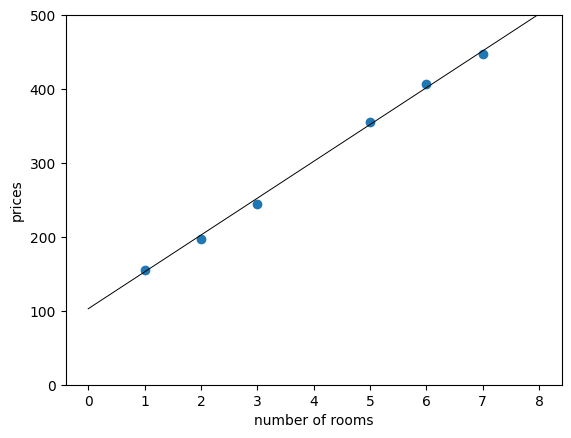

In [17]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for i in range(epochs):
      id=random.randint(0,5)
      num_rooms=features[id]
      price=labels[id]
      price_per_room, base_price=absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.5, epochs = 1000)

### Root mean squared error function

In [ ]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    m=len(labels)
    e=labels-predictions
    mse=1/m*np.linalg.norm(e)
    error=np.sqrt(mse)
    return error

### Plotting the error function

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [ ]:
from sklearn.linear_model import SGDRegressor
## TODO ##
# Use sklearn to implement linear regression (SGDRegressor) that fit our data (features, labels)
# set tol = None
# Tune alpha and max_iter

In [ ]:
## TODO ##
# print the coefficients and bias of this model


In [ ]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms


### Normal Equation



In [ ]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features

    return W

W = Normal_Equation(features,labels)
print(W)

### Real Example (Predict fuel efficiency)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

#### Clean data

In [ ]:
dataset.isna().sum()

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

In [ ]:
dataset.head()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
dataset.head()

In [ ]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [ ]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [ ]:
from sklearn.linear_model import SGDRegressor

# use single-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# print the score and the mse error

In [ ]:
from sklearn.linear_model import SGDRegressor

# use multi-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# print the score and the mse error

In [ ]:
from sklearn.linear_model import SGDRegressor

# use Normalized mlti-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# use sklearn.preprocessing.StandardScaler for normalization
# print the score and the mse error